<a href="https://colab.research.google.com/github/xx39xx16/xx39xx16/blob/main/hw4_2020741076.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import google.colab.drive as drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
df=pd.read_csv('./drive/MyDrive/Colab Notebooks/data/samsung.csv')
print(df)


           date  close  start   high    low    volume  transactionPrice  \
0    2022-11-22  60600  60900  61200  60300   9411289      5.714610e+11   
1    2022-11-21  61400  61400  61800  60800   9378097      5.737830e+11   
2    2022-11-18  61800  61800  62400  61400  12236503      7.574550e+11   
3    2022-11-17  61400  62000  62000  61300  13298296      8.191190e+11   
4    2022-11-16  62700  62400  62700  61700  12909260      8.042200e+11   
..          ...    ...    ...    ...    ...       ...               ...   
243  2021-11-26  72300  73500  74100  72000  13002242      9.443780e+11   
244  2021-11-25  73700  75100  75100  73600  12559258      9.295710e+11   
245  2021-11-24  74800  76000  76200  74100  15652305      1.174200e+12   
246  2021-11-23  75300  76000  76000  74500  22029195      1.656720e+12   
247  2021-11-22  74900  73300  75200  73000  27506623      2.047230e+12   

     capitalization  
0      3.617690e+14  
1      3.665450e+14  
2      3.689330e+14  
3      3.66

In [50]:
df1 = df[[ 'close', 'start', 'high', 'low', 'volume', 'transactionPrice', 'capitalization']]

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1)
arr = scaler.transform(df1)
arr
df1 = pd.DataFrame(arr, columns=df1.columns)
df1

,close,start,high,low,volume,transactionPrice,capitalization
0,0.286738,0.303887,0.279412,0.299296,0.113235,0.100030,0.286738
1,0.315412,0.321555,0.301471,0.316901,0.112203,0.101046,0.315413
2,0.329749,0.335689,0.323529,0.338028,0.201041,0.181389,0.329751
3,0.315412,0.342756,0.308824,0.334507,0.234042,0.208362,0.315413
4,0.362007,0.356890,0.334559,0.348592,0.221950,0.201845,0.362004
...,...,...,...,...,...,...,...
243,0.706093,0.749117,0.753676,0.711268,0.224840,0.263153,0.706093
244,0.756272,0.805654,0.790441,0.767606,0.211073,0.256676,0.756274
245,0.795699,0.837456,0.830882,0.785211,0.307203,0.363683,0.795702
246,0.813620,0.837456,0.823529,0.799296,0.505394,0.574749,0.813624


In [52]:
df_corr= df1.corr()
df_corr_sort= df_corr.sort_values('close')
df_corr_sort['close']


volume             -0.094286
transactionPrice    0.248981
start               0.995367
low                 0.997926
high                0.998324
capitalization      1.000000
close               1.000000
Name: close, dtype: float64

In [53]:
x_train_pre= df1.iloc[:,0:7]
y= df1['close'].values
x_train, x_test, y_train, y_test= train_test_split(x_train_pre,y,test_size=0.2)
print(x_test)

        close     start      high       low    volume  transactionPrice  \
84   0.283154  0.335689  0.312500  0.306338  0.342321          0.298830   
93   0.200717  0.144876  0.187500  0.158451  0.483441          0.390138   
181  0.698925  0.664311  0.680147  0.676056  0.373387          0.406572   
155  0.551971  0.572438  0.547794  0.570423  0.463565          0.466771   
204  0.824373  0.830389  0.816176  0.806338  0.311013          0.368971   
221  0.992832  0.985866  0.985294  0.982394  0.387203          0.487912   
144  0.516129  0.526502  0.503676  0.524648  0.187210          0.195359   
81   0.304659  0.303887  0.305147  0.316901  0.106472          0.097440   
196  0.731183  0.749117  0.735294  0.725352  0.263335          0.303800   
210  0.906810  0.954064  0.944853  0.919014  0.252413          0.326239   
162  0.630824  0.625442  0.613971  0.633803  0.246098          0.269370   
110  0.333333  0.314488  0.316176  0.327465  0.585493          0.514594   
139  0.530466  0.452297  

In [54]:
model=Sequential()
model.add(Dense(10,input_dim=7,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1))
model.summary()

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

early_stopping_callback= EarlyStopping(monitor='val_loss', patience=20)

history= model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.25, verbose=1, callbacks= [early_stopping_callback])

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 10)                80        
                                                                 
 dense_53 (Dense)            (None, 30)                330       
                                                                 
 dense_54 (Dense)            (None, 40)                1240      
                                                                 
 dense_55 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5/5 [==============================] - 1s 41ms/step - loss: 0.5606 - mse: 0.5606 - val_loss: 0.5228 - val_mse: 0.5228
Epoch 2/10
5/5 [==============================] - 0s 9

2/2 [==============================] - 0s 4ms/step
real price: {} expected price: 0.2831541218637994
real price: {} expected price: 0.2007168458781361
real price: {} expected price: 0.6989247311827957
real price: {} expected price: 0.5519713261648744
real price: {} expected price: 0.8243727598566306
real price: {} expected price: 0.9928315412186379
real price: {} expected price: 0.5161290322580643
real price: {} expected price: 0.3046594982078854
real price: {} expected price: 0.7311827956989247
real price: {} expected price: 0.9068100358422939
real price: {} expected price: 0.6308243727598566
real price: {} expected price: 0.33333333333333326
real price: {} expected price: 0.5304659498207884
real price: {} expected price: 0.33333333333333326
real price: {} expected price: 0.6774193548387097
real price: {} expected price: 0.5017921146953406
real price: {} expected price: 0.4910394265232976
real price: {} expected price: 0.5412186379928314
real price: {} expected price: 0.09318996415770

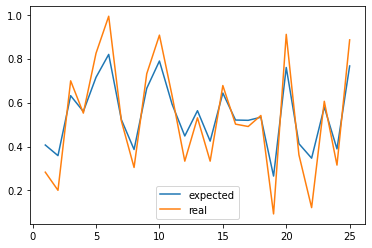

In [61]:
real_prices=[]
pred_prices=[]
x_num=[]

n_iter=0
y_prediction = model.predict(x_test).flatten()
for i in range(25):
  real=y_test[i]
  prediction=y_prediction[i]
  print('real price: {}', 'expected price: {}'.format(real,prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter= n_iter+1
  x_num.append(n_iter)

plt.plot(x_num, pred_prices, label= 'expected')
plt.plot(x_num,real_prices,label= 'real')
plt.legend()
plt.show()